In [5]:
import numpy as np
import pandas as pd

import yfinance as ys

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
stocks = input('Enter the code of the stock:-')
data = ys.download(stocks , '2008-01-01' , '2021-01-18' , auto_adjust=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [8]:
data.shape

(3282, 5)

In [9]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


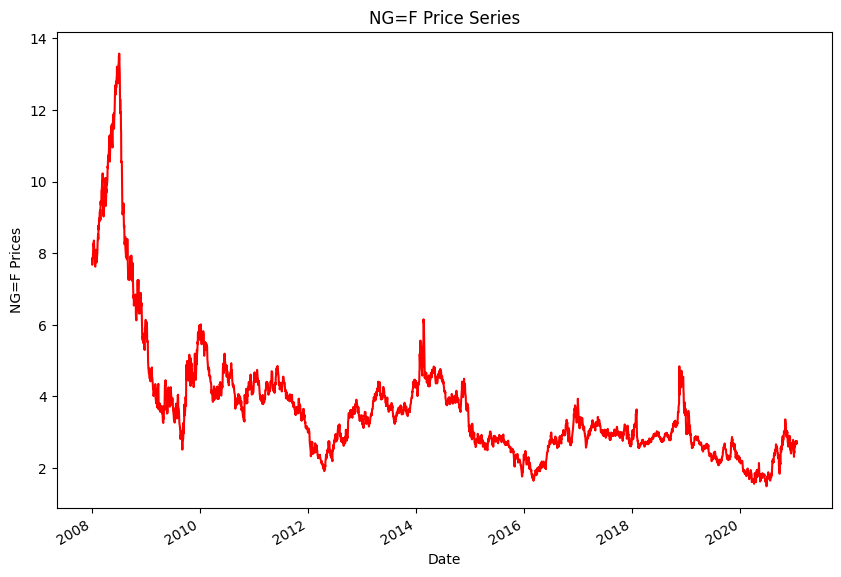

In [10]:
data.Close.plot(figsize=(10,7) , color='r')
plt.ylabel('{} Prices'.format(stocks))
plt.title('{} Price Series'.format(stocks))
plt.show()

d:\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


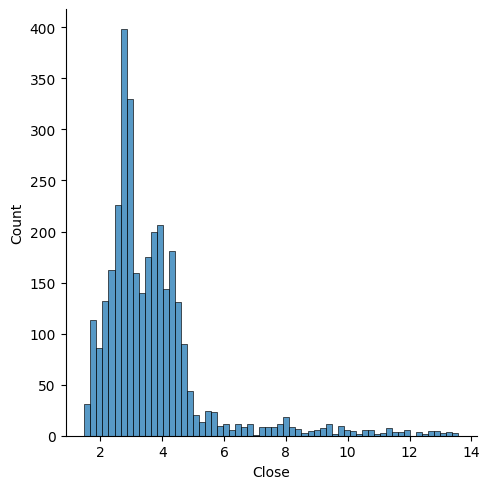

In [13]:
sns.displot(data['Close'])

In [15]:
x = data.drop('Close' , axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
pred1 = lr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error , r2_score

def calculate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test , y_pred)

    print('MSE:-',mse)
    print('RMSE:-',rmse)
    print('R2_score:-',r_score)

calculate_metrics(y_test,pred1)

MSE:- 0.0015345662928876315
RMSE:- 0.03917354072441795
R2_score:- 0.9994383299702705


In [19]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(x_train,y_train)
ri = Ridge().fit(x_train,y_train)

la_p = la.predict(x_test)
ri_p = ri.predict(x_test)

In [20]:
calculate_metrics(y_test , la_p)

MSE:- 0.2369233626053286
RMSE:- 0.48674774021594447
R2_score:- 0.9132831519010187


In [21]:
calculate_metrics(y_test , ri_p)

MSE:- 0.0016151026199614476
RMSE:- 0.040188339353118926
R2_score:- 0.9994088526896658


In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

para_grid = {'C':[0.1, 1, 10, 100, 1000],
             'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['rbf']}

grid = GridSearchCV(SVR(), para_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [ ]:
import joblib

joblib.dump(ri, 'model.pkl')

ridge_from_joblib = model = joblib.load('model.pkl')